In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import missingno as msno

%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
id                                     int64
target                                 float64
comment_text                           object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float

In [4]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


# 결측치

In [5]:
train.isnull().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

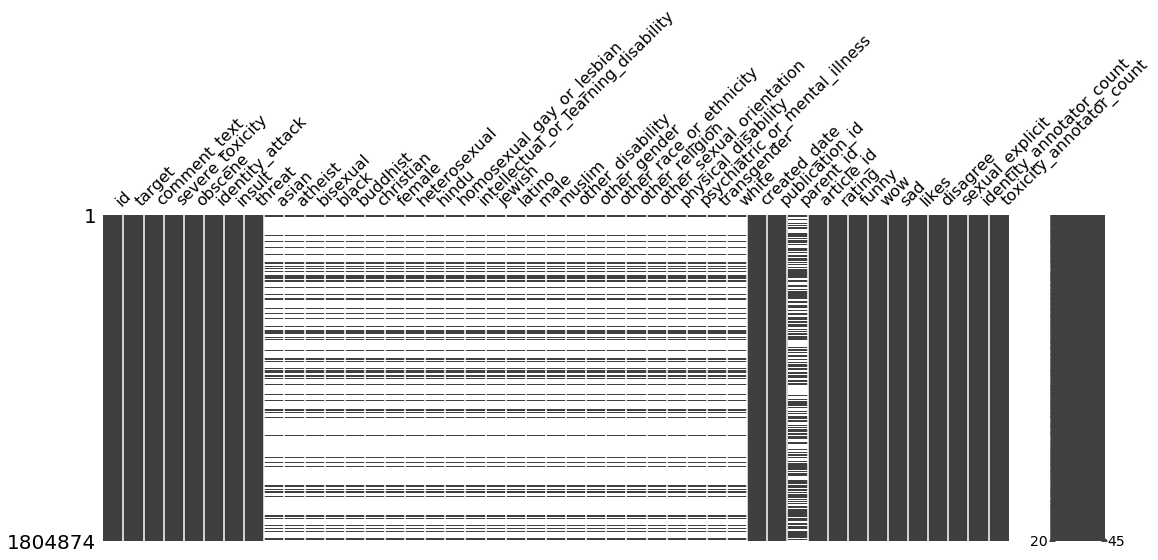

In [6]:
msno.matrix(train, figsize=(18, 6))

## TARGET CORRELATION PLOT

In [7]:
#If you want to see the correlation matrix, uncomment the code below
correlation_matrix = train.corr()
#correlation_matrix

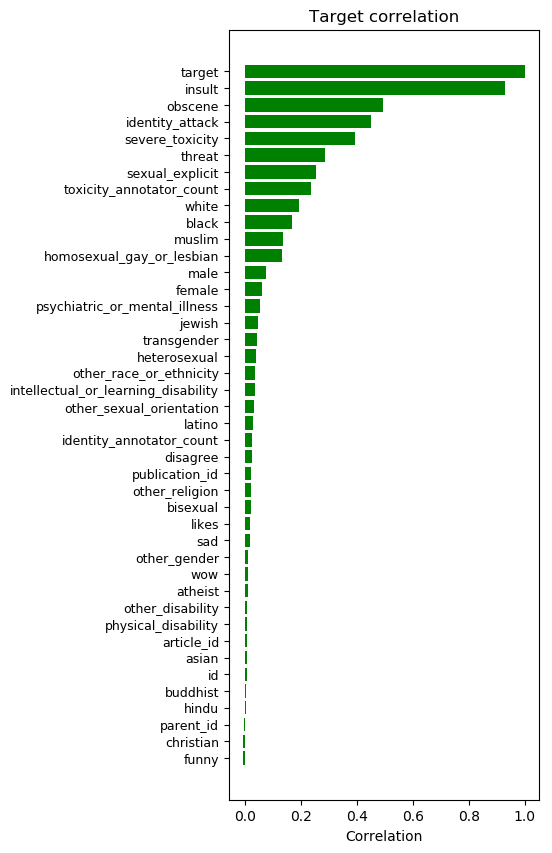

In [8]:
#Plots target correlation
target_correlation = correlation_matrix['target'].copy()
target_correlation = target_correlation.sort_values(ascending = False)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4, 10))

# Example data
columns = list(target_correlation.index)
y_pos = np.arange(len(columns))
nan_percentage = list(target_correlation.values)

ax.barh(y_pos, nan_percentage, color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(columns, fontsize = 9)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Target correlation')
plt.show()

# Feature Grouping

In [9]:
#Separate columns into groups
ID_target_comment_text = ['id', 'target', 'comment_text']

main_indicators = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']

identity_columns = ['asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian',
                    'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
                    'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
                    'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
                    'other_religion', 'other_sexual_orientation', 'physical_disability',
                    'psychiatric_or_mental_illness', 'transgender', 'white']

# Only identities with more than 500 examples in the test set (combined public and private)
# will be included in the evaluation calculation. 
main_identities = ['male', 'female', 'homosexual_gay_or_lesbian',
                    'christian', 'jewish', 'muslim', 'white', 'black',
                    'psychiatric_or_mental_illness']

comment_properties = ['created_date', 'publication_id', 'parent_id', 'article_id']

reactions = ['funny', 'wow', 'sad', 'likes', 'disagree', 'rating']

annotators = ['identity_annotator_count', 'toxicity_annotator_count']

In [10]:
for column in main_indicators + main_identities:
    print('-'*5, column, '-'*5, '\n')
    comment, target, column_value = train[['comment_text', 'target', column]][train[column] == train[column].max()].iloc[0]
    print('target:', target)
    print(str(column)+':', column_value)
    print(comment, '\n')

----- severe_toxicity ----- 

target: 1.0
severe_toxicity: 1.0
Awesome! Lets cut the head off hate! Lets stab it and burn its house down! lets march together and beat hate with rocks and clubs and run out out of town! Hooray for us for showing hate we will not tolerate it and will kill or beat down any that oppose or stance against hate. 

Yeah, that sounds like the good guys. Why is it so hard for people to admit that using violence to achieve a goal is not acceptable in a civil society? 

----- obscene ----- 

target: 1.0
obscene: 1.0
Where do you get the Sour Grapes to say this is a Bernie person?  Based on how Bernie does not allow this crap to go on where do you get off with the accusation? 

----- identity_attack ----- 

target: 1.0
identity_attack: 1.0
On the other hand, if you were a homosexual stoner with a pre-existing medical condition who works in the public sector - my guess is that Mr. Obama has been great. 

----- insult ----- 

target: 1.0
insult: 1.0
Where do you get t

In [11]:
#BIGGER IDENTITY GROUPS
#This is how I would classify the columns. You might desagree. Feel free to change.
#Physical disability and other disability have a single category, so it doesn't need to be grouped.
religion_columns = ['atheist', 'buddhist', 'christian', 'hindu', 'jewish', 'muslim', 'other_religion']
gender_columns = ['male', 'female']
sexuality_columns = ['heterosexual', 'homosexual_gay_or_lesbian', 'other_gender', 'other_sexual_orientation', 'transgender']
ethinicity_columns = ['black', 'latino', 'white', 'asian', 'other_race_or_ethnicity']
mental_disability_columns = ['intellectual_or_learning_disability', 'psychiatric_or_mental_illness']

train['is_religion_related'] = (train[religion_columns] > 0).sum(axis=1)
train['is_gender_related'] = (train[gender_columns] > 0).sum(axis=1)
train['is_sexuality_related'] = (train[sexuality_columns] > 0).sum(axis=1)
train['is_ethinicity_related'] = (train[ethinicity_columns] > 0).sum(axis=1)
train['is_mental_disability_related'] = (train[mental_disability_columns] > 0).sum(axis=1)

#LIKES RATIO
pd.options.mode.chained_assignment = None  # desible copy warning - default='warn'
train['disagree_to_likes'] = 0
train['funny_to_likes'] = 0
train['wow_to_likes'] = 0
train['sad_to_likes'] = 0
train['all_to_likes'] = 0
train['disagree_to_likes'][train['likes'] > 0] = train['disagree'][train['likes'] > 0] / train['likes'][train['likes'] > 0]
train['funny_to_likes'][train['likes'] > 0] = train['funny'][train['likes'] > 0] / train['likes'][train['likes'] > 0]
train['wow_to_likes'][train['likes'] > 0] = train['wow'][train['likes'] > 0] / train['likes'][train['likes'] > 0]
train['sad_to_likes'][train['likes'] > 0] = train['sad'][train['likes'] > 0] /train['likes'][train['likes'] > 0]
train['all_to_likes'][train['likes'] > 0] = train[['disagree', 'funny', 'wow', 'sad']][train['likes'] > 0].sum(axis = 1) / train['likes'][train['likes'] > 0]

#COMMENTS PROPERTIES
#rating
train['rating'] = train['rating'].apply(lambda x: 1 if x =='approved' else 0)

#has_parent_id
train['has_parent_id'] = train['parent_id'].apply(lambda x: 1 if x > 0 else 0)

#date
# train['created_date'] = pd.to_datetime(train['created_date'])
# earliest_date = train['created_date'].min()
# train['created_date'] = train['created_date'].apply(lambda x: (x - earliest_date).days)

#TOXICITY RELATED TO IDENTITY

#identity_degree
train['identity_degree'] = (train[identity_columns] > 0).sum(axis=1)

#identity_weight
train['identity_weight'] = train[identity_columns].sum(axis=1)

#is_identity_related
train['is_identity_related'] = train['identity_degree'].apply(lambda x: 1 if x>0 else 0)

#is_main_identity_related
train['in_main_identity_related'] = 0
for identity in main_identities:
    train['in_main_identity_related'] += train[identity].apply(lambda x: 1 if x>0 else 0)

train['in_main_identity_related'] = train['in_main_identity_related'].apply(lambda x: 1 if x >0 else 0)

#FILLING NaN
train.fillna(0, inplace = True)

## ROC-AUC
- 이야기 해보고 싶은 자료

In [12]:
columns_to_make_binary = ['target'] + main_indicators

train_binary = train[columns_to_make_binary].copy()

binary_threshold = 0.5
for column in columns_to_make_binary:
    train_binary[column] = train_binary[column].apply(lambda x: 1 if x >= binary_threshold else 0)

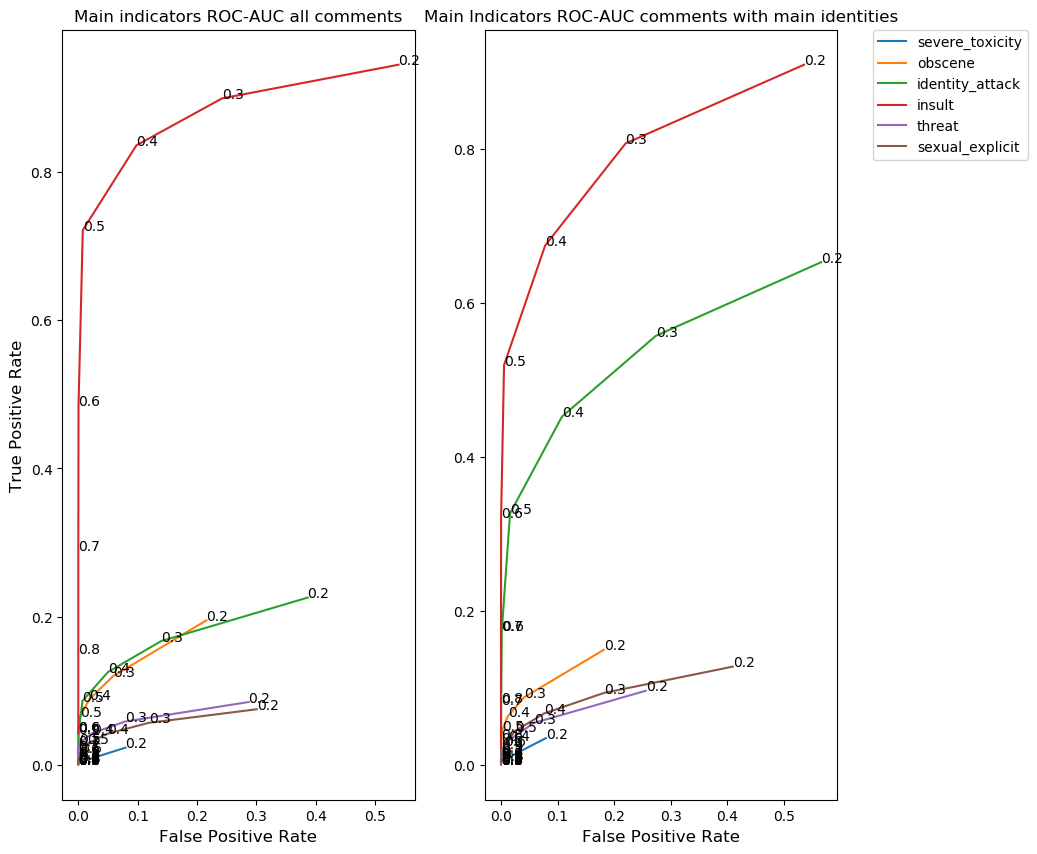

In [13]:
#FIRST GRAPH
train_binary = train[columns_to_make_binary].copy()

train_binary['target'] = train_binary['target'].apply(lambda x: 1 if x >= 0.5 else 0)

# target이 1인 경우
all_positives = (train_binary['target'] == 1).sum()

true_positive_dict = dict()
false_negative_dict = dict()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

for column in main_indicators:
    true_positive_dict[column] = []
    false_negative_dict[column] = []

    for binary_threshold in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        train_binary[column] = train[column].apply(lambda x: 1 if x >= binary_threshold else 0)
        # target 0이면서, 컬럼 값이 0 이상인 경우
        all_negatives = (train_binary['target'][train[column] > 0] == 0).sum()
        
        # target 1이면서, 컬럼 값이 1인 
        true_positives = (train_binary[column][train_binary['target'] == 1] == 1).sum() 
        # target이 0이지만, 컬럼 값이 1인 경우
        false_positive = (train_binary[column][(train_binary['target'] == 0) & (train[column] > 0)] == 1).sum()
        
        true_positive_dict[column].append(true_positives/all_positives)
        false_negative_dict[column].append(false_positive/all_negatives)
    
        ax1.annotate(binary_threshold, (false_positive/all_negatives, true_positives/all_positives))
    
    ax1.plot(false_negative_dict[column], true_positive_dict[column], label = column)
    
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_xlabel('False Positive Rate', fontsize=12)
    

#SECOND GRAPH
train_temp = train[columns_to_make_binary][train['in_main_identity_related'] > 0].copy()

train_binary = train_temp.copy()
train_binary['target'] = train_binary['target'].apply(lambda x: 1 if x >= 0.5 else 0)

all_positives = (train_binary['target'] == 1).sum()

true_positive_dict = dict()
false_negative_dict = dict()

for column in main_indicators:
    true_positive_dict[column] = []
    false_negative_dict[column] = []

    for binary_threshold in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        train_binary[column] = train[column].apply(lambda x: 1 if x >= binary_threshold else 0)
        all_negatives = (train_binary['target'][train_temp[column] > 0] == 0).sum()
        
        true_positives = (train_binary[column][train_binary['target'] == 1] == 1).sum()
        false_positive = (train_binary[column][(train_binary['target'] == 0) & (train_temp[column] > 0)] == 1).sum()

        true_positive_dict[column].append(true_positives/all_positives)
        false_negative_dict[column].append(false_positive/all_negatives)
        ax2.annotate(binary_threshold, (false_positive/all_negatives, true_positives/all_positives))
            
    ax2.plot(false_negative_dict[column], true_positive_dict[column], label = column)


ax1.set_title('Main indicators ROC-AUC all comments')
ax2.set_title('Main Indicators ROC-AUC comments with main identities')
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.legend(bbox_to_anchor=(1.10, 1), loc=2, borderaxespad=0.)    
plt.show()

## IDENTITY, REACTIONS AND ANNOTATORS
- 피처 평균 값 높은 피처 : 인종, likes, rating

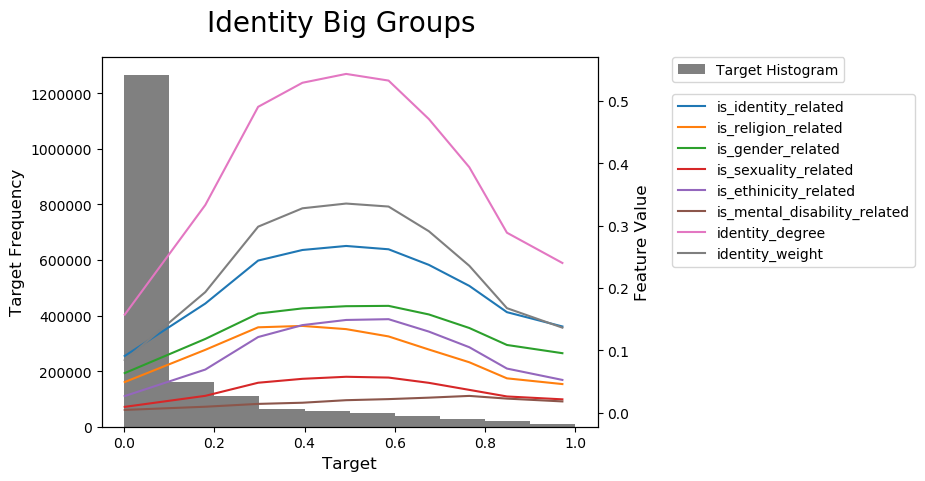

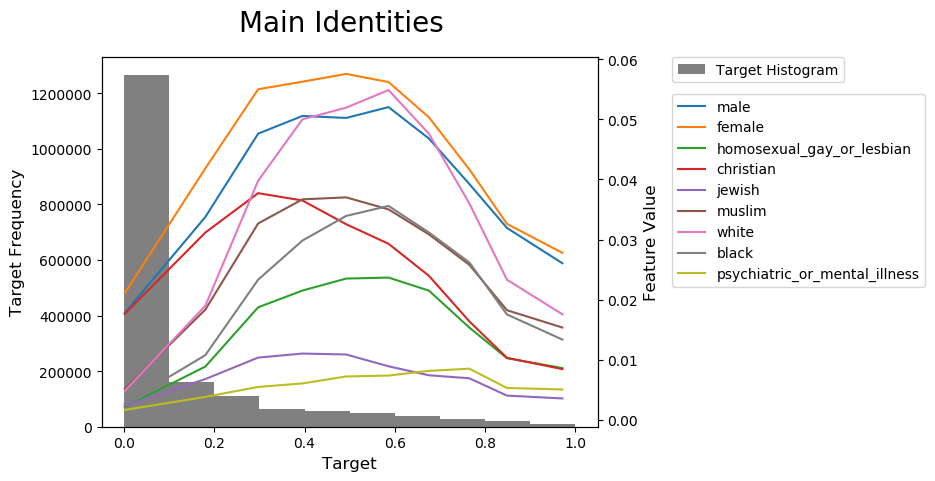

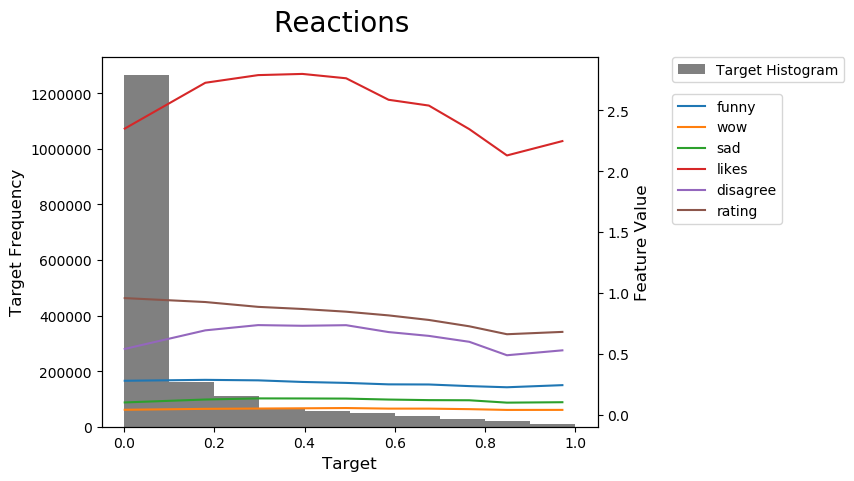

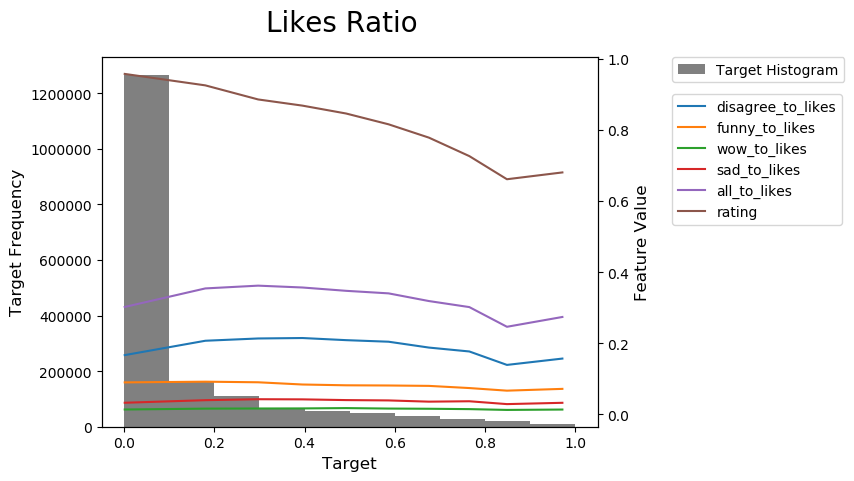

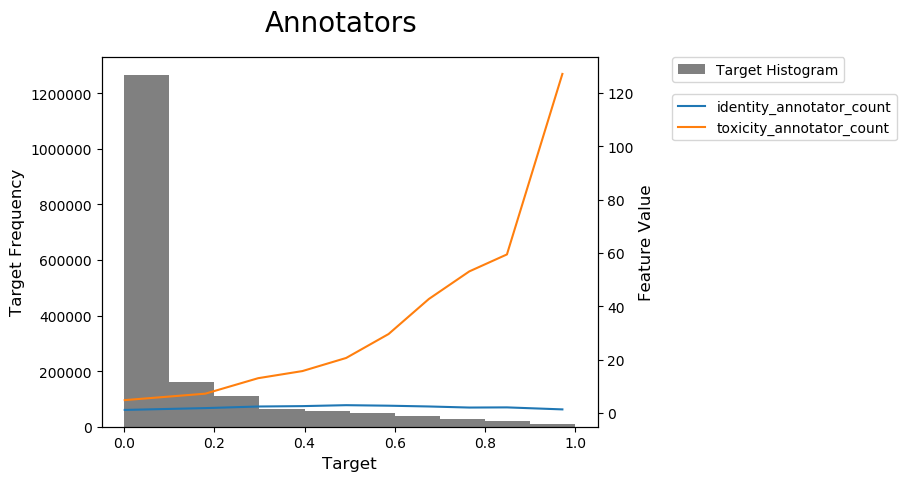

In [14]:
train_binned = train.copy()
train_binned['target_binned'] = pd.cut(train_binned['target'], bins = 10)
train_binned = train_binned.groupby('target_binned').mean().copy()

identity_big_groups = ['is_identity_related', 'is_religion_related', 'is_gender_related', 'is_sexuality_related',
            'is_ethinicity_related', 'is_mental_disability_related', 'identity_degree',
           'identity_weight']

likes_ratio = ['disagree_to_likes', 'funny_to_likes', 'wow_to_likes', 'sad_to_likes', 'all_to_likes', 'rating']
titles = ['Identity Big Groups', 'Main Identities', 'Reactions', 'Likes Ratio', 'Annotators']
for columns, title in zip([identity_big_groups, main_identities, reactions, likes_ratio, annotators], titles):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.hist(train['target'], color = 'grey', bins = np.array(range(11))/10, label = 'Target Histogram')
    ax1.set_ylabel('Target Frequency', fontsize=12)
    for i in range(len(columns)):
        ax2.plot(train_binned['target'], train_binned[columns[i]], label = columns[i])
    ax1.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(1.15, 0.9), loc=2, borderaxespad=0.)
    ax2.set_ylabel('Feature Value', fontsize=12)
    ax1.set_xlabel('Target', fontsize=12)
    fig.suptitle(title, fontsize=20)
    plt.show()

# Feature 추가 후 상관관계

In [15]:
train['total_length'] = train['comment_text'].apply(len)
train['capitals'] = train['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
train['caps_vs_length'] = train.apply(lambda row: float(row['capitals'])/float(row['total_length']),axis=1)
train['num_exclamation_marks'] = train['comment_text'].apply(lambda comment: comment.count('!'))
train['num_question_marks'] = train['comment_text'].apply(lambda comment: comment.count('?'))
train['num_punctuation'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
train['num_symbols'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
train['num_words'] = train['comment_text'].apply(lambda comment: len(comment.split()))
train['num_unique_words'] = train['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
train['words_vs_unique'] = train['num_unique_words'] / train['num_words']
train['num_smilies'] = train['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [16]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks','num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words','words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit','identity_annotator_count', 'toxicity_annotator_count')
rows = [{c:train[f].corr(train[c]) for c in columns} for f in features]
train_correlations = pd.DataFrame(rows, index=features)

- funny : total_length, capitals, num_puctuation, num_words, num_unique_words 낮은편
    - 가설 : 재밌는 것에는 말을 많이 하지 않는다.
- identity_attack : total_length, capitals, num_puctuation, num_words, num_unique_words 높은편
    - 가설 : 인신 공격할 때 말이 많아진다.
- likes : total_length,  num_words, num_unique_words 높은 편
    - 가설 : 좋아하는 것에도 말이 많아진다.
- insult, target, obscene : num_exclamation_marks 높은편
    - 가설 : 모욕, 음탕한, target에서는 강조(!)

[Text(0.5,0,'disagree'),
 Text(1.5,0,'funny'),
 Text(2.5,0,'identity_annotator_count'),
 Text(3.5,0,'identity_attack'),
 Text(4.5,0,'insult'),
 Text(5.5,0,'likes'),
 Text(6.5,0,'obscene'),
 Text(7.5,0,'sad'),
 Text(8.5,0,'severe_toxicity'),
 Text(9.5,0,'sexual_explicit'),
 Text(10.5,0,'target'),
 Text(11.5,0,'threat'),
 Text(12.5,0,'toxicity_annotator_count'),
 Text(13.5,0,'wow')]

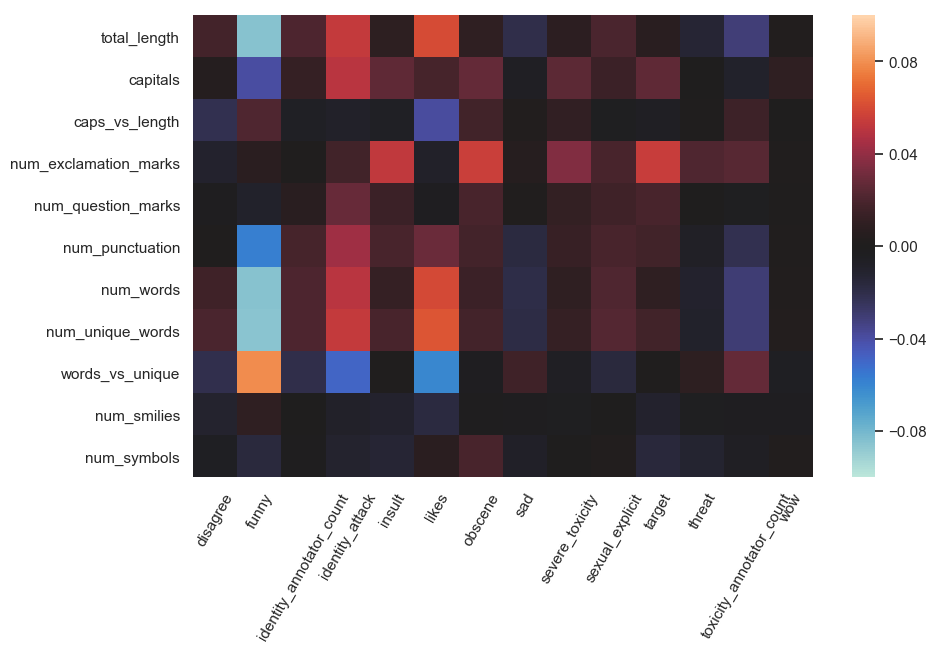

In [17]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)
ax = sns.heatmap(train_correlations, vmin=-0.1, vmax=0.1, center=0.0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Demographics
- nomalization 인구통계
- white, black, homosexual_gay_or_lesbian, muslim 순으로 인종, 성, 종교 순으로 독설

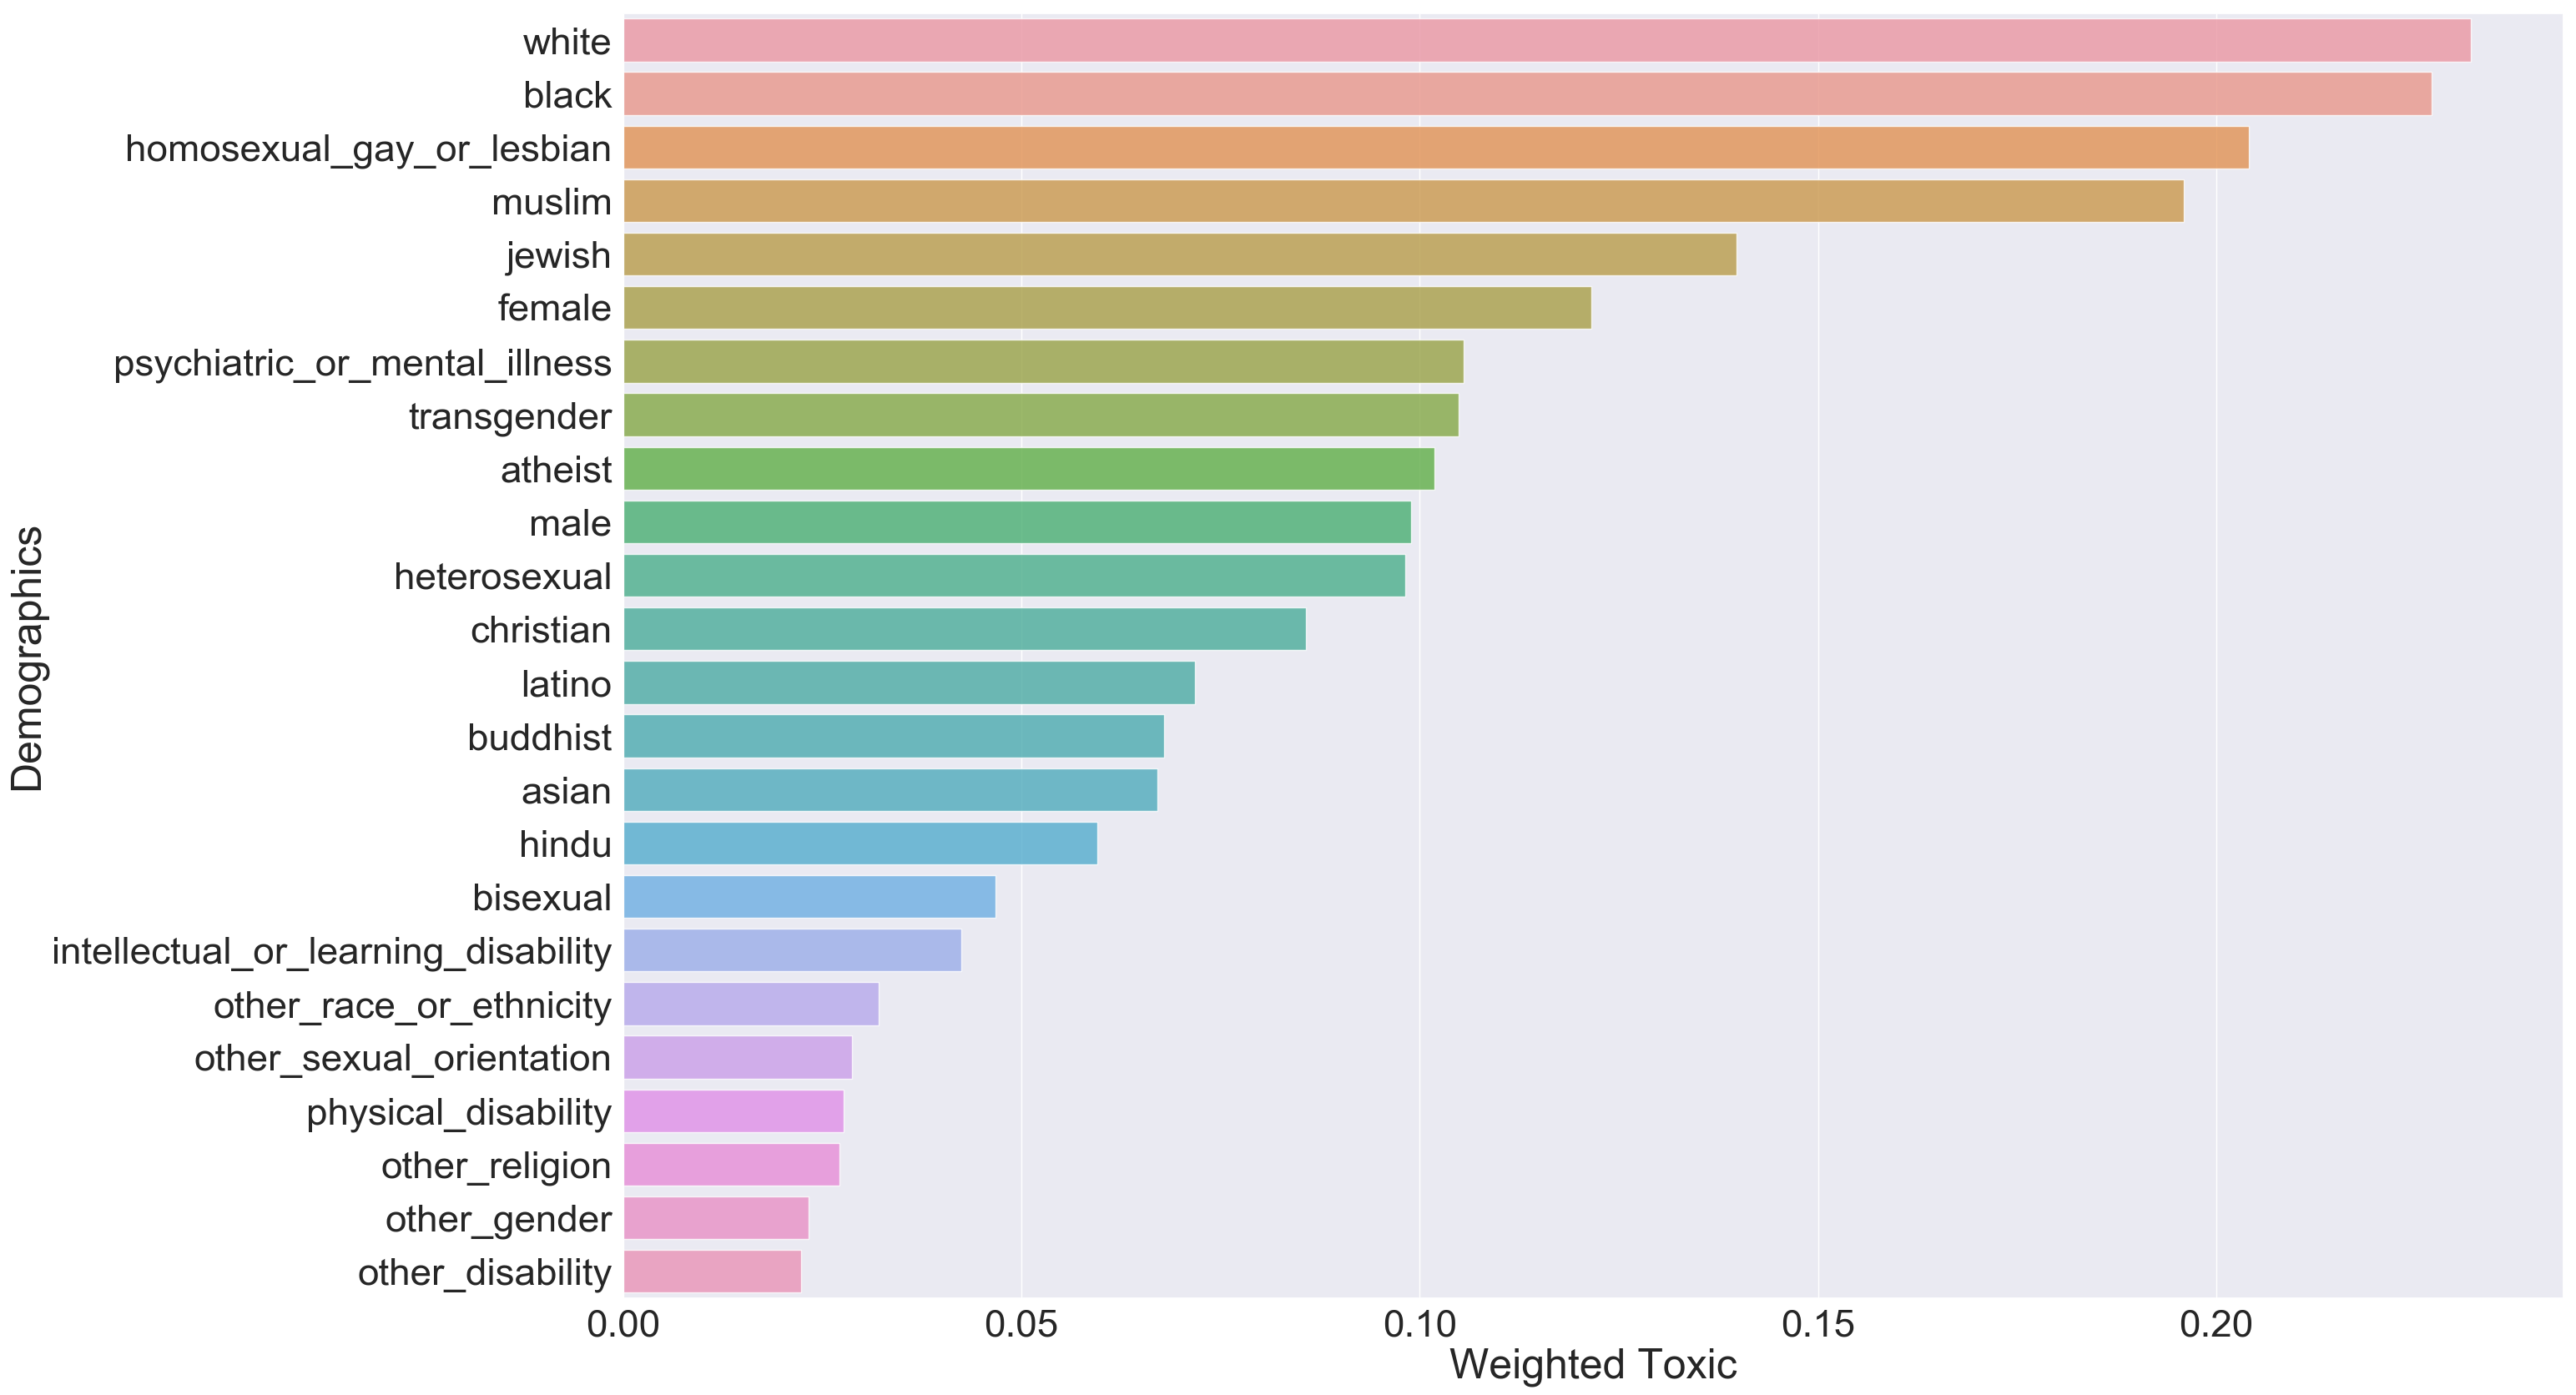

In [18]:
demographics = train.loc[:, ['target']+list(train)[slice(8,32)]].dropna()
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis="index").sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxic')
plt.show()

# Identity

In [19]:
identities = tuple(train.iloc[:, 8:32])
rows = [{c:train[f].corr(train[c]) for c in columns} for f in identities]
poptoxicity_correlations = pd.DataFrame(rows, index=identities)

- identity_attack : 
    - 인종 : black, latino, other_race_or_ethnicity, white
    - 성 : female, hetrosexual, homosexual_gay_or_lesbian, male, other_sexual_orientation, transgender, 
    - 종교 : christian, jewish, other_religion, muslim

- insult :
    - 인종 : white, black
    - 성 : male, homosexual_gay_or_lesbian
    - 종교 : muslim
    - 장애 : psychiatric_or_mental_illness, intellectual_or_learning_disability

- severe_toxicity :
    - 인종 : white, black
    - 성 : homosexual_gay_or_lesbian, 
    - 종교 : muslim

- sexual_explicit :
    - 성 : male, female, homosexual_gay_or_lesbian, homosexual_gay_or_lesbian, other_sexual_orientation

- target :
    - 인종 : white, black
    - 성 : female, male, homosexual_gay_or_lesbian
    - 종교 : muslim
    - 장애 : psychiatric_or_mental_illness

- threat :
    - 인종 : black
    - 종교 : muslim

[Text(0.5,0,'disagree'),
 Text(1.5,0,'funny'),
 Text(2.5,0,'identity_annotator_count'),
 Text(3.5,0,'identity_attack'),
 Text(4.5,0,'insult'),
 Text(5.5,0,'likes'),
 Text(6.5,0,'obscene'),
 Text(7.5,0,'sad'),
 Text(8.5,0,'severe_toxicity'),
 Text(9.5,0,'sexual_explicit'),
 Text(10.5,0,'target'),
 Text(11.5,0,'threat'),
 Text(12.5,0,'toxicity_annotator_count'),
 Text(13.5,0,'wow')]

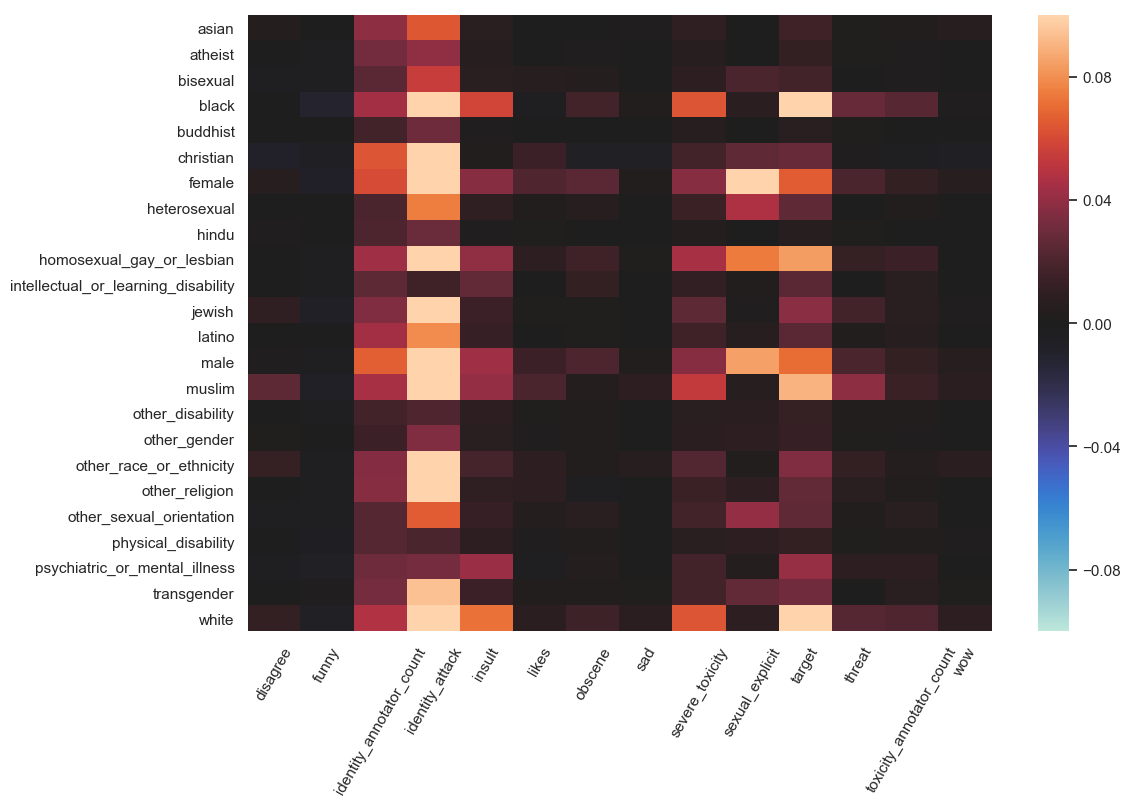

In [20]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.heatmap(poptoxicity_correlations, vmin=-0.1, vmax=0.1, center=0.0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Date

In [21]:
withdate = train.loc[:, ['created_date', 'target']+list(train)[slice(8,32)]].dropna()
raceweighted = withdate.iloc[:, 2:]/withdate.iloc[:, 2:].sum()
race_target_weighted = raceweighted.multiply(withdate.iloc[:, 1], axis="index")
race_target_weighted['created_date'] = pd.to_datetime(withdate['created_date']).values.astype('datetime64[M]')
weighted_demo = race_target_weighted.groupby(['created_date']).sum().sort_index()

In [22]:
import plotly
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='13217', api_key='FG6itEaCMouvPJVR7DlI')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Race : 2017년 8월 급증

In [23]:
weighted_demo[['white', 'asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity']].iplot(title = 'Time Series Toxicity & Race', filename='Time Series Toxicity & Race' )

# Click on the legend to change display. Double click for single identity.

### Religion : 2017년 1~2, 6, 9, 10월 급증 (종교에 따라 상이)

In [24]:
weighted_demo[['atheist', 'buddhist', 'christian', 'hindu', 'muslim', 'other_religion']].iplot(title = 'Time Series Toxicity & Religion', filename='Time Series Toxicity & Religion')

# Click on the legend to change display. Double click for single identity.

### Sexual

In [25]:
weighted_demo[['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']].iplot(title = 'Time Series Toxicity & Sexual Orientation', filename='Time Series Toxicity & Sexual Orientation')

# Click on the legend to change display. Double click for single identity.

### Gender : 2016년 12월, 2017년 7, 10월 급증

In [26]:
weighted_demo[['male', 'female', 'transgender', 'other_gender']].iplot(title = 'Time Series Toxicity & Gender', filename='Time Series Toxicity & Gender')

# Click on the legend to change display. Double click for single identity.

### 장애 : 2017년 1, 6, 8, 10월 급증

In [27]:
weighted_demo[['physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability']].iplot(title = 'Time Series Toxicity & Disability', filename='Time Series Toxicity & Disability')

# Click on the legend to change display. Double click for single identity.

#### 2017년 8월 white와 관련된 단어가 다른 기간에 비교하여 많은 차이가 남
#### 2017년 1월 muslim, hindu가 다른 기간에 비해 차이가 많이 남
#### 2017년 12월 buddhist가 다른 기간에 비해 차이가 많이 남

In [28]:
alldate_toxicity = train[train['target'] >= 0.5].loc[:, ['created_date', 'target', 'comment_text']].dropna()
alldate_toxicity['created_date'] = pd.to_datetime(alldate_toxicity['created_date']).values.astype('datetime64[M]')
aug_2017_toxicity = alldate_toxicity[alldate_toxicity['created_date'] == '2017-08-01']

from nltk.corpus import stopwords
def check_frequency(data = alldate_toxicity['comment_text'], n = 20):
    stop = stopwords.words('english')
    data  = data.apply(lambda x: " ".join(x.lower() for x in x.split()))
    data = data.str.replace('[^\w\s]','')
    data = data.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    freq = pd.Series(' '.join(data).split()).value_counts()[:n]
    return freq

top_10_toxicity_othertime = check_frequency(data = alldate_toxicity[alldate_toxicity['created_date'] != '2017-08-01']['comment_text'], n = 10)
top_10_toxicity_aug_2017 = check_frequency(data = aug_2017_toxicity['comment_text'], n = 10)

In [29]:
top_10_toxicity_aug_2017.index.difference(top_10_toxicity_othertime.index)

Index(['white'], dtype='object')

In [30]:
percent_toxicity_othertime = top_10_toxicity_othertime / alldate_toxicity[alldate_toxicity['created_date'] != '2017-08-01']['comment_text'].str.split().str.len().sum()
percent_toxicity_aug_2017 = top_10_toxicity_aug_2017 / aug_2017_toxicity['comment_text'].str.split().str.len().sum()
top_toxicity = pd.concat([percent_toxicity_aug_2017, percent_toxicity_othertime], axis=1, sort=False)
top_toxicity.columns = ['Aug_2017', 'Other_Time']
top_toxicity['Difference'] = top_toxicity['Aug_2017'] - top_toxicity['Other_Time']

#### 정치적 이슈와 관련된 것으로 보임

In [31]:
top_toxicity.head(30)

,Aug_2017,Other_Time,Difference
trump,0.005206,0.004212,0.000994
people,0.004177,0.003987,0.000189
like,0.003623,0.003652,-0.000029
white,0.003575,NaN,NaN
one,0.002769,0.002668,0.000102
would,0.002768,0.002811,-0.000044
dont,0.002597,0.002664,-0.000067
get,0.002328,0.002426,-0.000099
stupid,0.001871,0.002085,-0.000213
us,0.001867,0.001956,-0.000089


In [32]:
import plotly.graph_objs as go
trace1 = go.Bar(
    x=top_toxicity.index,
    y=top_toxicity['Aug_2017'],
    name='Aug_2017'
)
trace2 = go.Bar(
    x=top_toxicity.index,
    y=top_toxicity['Other_Time'],
    name='Other_Time'
)

data = [trace2, trace1]
layout = go.Layout(
    barmode='group'
)
layout = go.Layout(yaxis=dict(tickformat=".2%"))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, title = 'Top Toxicity Comarision', filename='top_toxicity_comarision')

# Time

In [33]:
train['datetime64'] = pd.to_datetime(train['created_date']).values.astype('datetime64[h]')
train['hour'] = train['datetime64'].dt.hour
all_comments_by_hour = train['target'].groupby(train['hour']).sum().sort_index()/train['target'].groupby(train['hour']).sum().sum()
toxic_comments_by_hour = train[train['target'] >= 0.5]['target'].groupby(train['hour']).sum().sort_index()/train[train['target'] >= 0.5]['target'].groupby(train['hour']).sum().sum()
comments_hour_check = pd.concat([all_comments_by_hour, toxic_comments_by_hour], axis=1, sort=False)
comments_hour_check.columns = ['all_comments', 'toxic_comments']

- 저녁시간과 자정시간의 댓글이 많은 편(독설 포함)
- 자정부터 새벽 시간대에 독설이 더 높은 비중을 차지함

In [34]:
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']
tickvals = ['0', '6', '12', '18', comments_hour_check.index.max()]

trace1 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['all_comments'],
    name = 'comment percent per H',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 1)
)
trace2 = go.Scatter(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments'],
    name = 'toxic comment percent per H',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 1,)
)

trace3 = go.Bar(
    x=comments_hour_check.index,
    y=comments_hour_check['toxic_comments']-comments_hour_check['all_comments'],
    name = 'More Toxic Comment Ratio'
)

data = [trace1, trace2, trace3]

layout = go.Layout(yaxis=dict(tickformat=".2%"),
                   title = 'Which Time are People More Toxic',
                   xaxis=go.layout.XAxis(
                       ticktext=labels, 
                       tickvals=tickvals
                   ),
                  )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Which Time are People More Toxic')

# Data cleansing

- 데이터셋의 단어가 glove에 포함된 단어의 비율은 약 16%, 전체 텍스트의 약 90%
- 데이터셋 클린징을 통해 데이터셋의 단어가 glove에 포함된 단어의 비율을 약 55%, 전체 텍스트의 약 100%까지 늘림

In [66]:
import operator 
import re
import gensim

In [67]:
# Due to the memory limit, here we only are using glove, while if you have a better machine, you can also load crawl and other embeddings

df = pd.concat([train.iloc[:, [0,2]] ,test.iloc[:, :2]])
glove = 'glove.840B.300d.txt'
crawl =  'crawl-300d-2M.vec'
    
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    if file == 'crawl-300d-2M.vec':
        embeddings_index = gensim.models.KeyedVectors.load_word2vec_format(crawl)
    else:
#         embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='utf-8'))
    return embeddings_index

In [68]:
print("Extracting GloVe embedding")
embed_glove = load_embed(glove)
# print("Extracting Crawl embedding")
# embed_crawl = load_embed(crawl)

Extracting GloVe embedding
Extracting Crawl embedding


In [69]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

vocab = build_vocab(df['comment_text'])

def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

In [70]:
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
# print("Crawl : ")
# oov_crawl = check_coverage(vocab, embed_crawl)

Glove : 
Found embeddings for 15.58% of vocab
Found embeddings for  89.63% of all text
Crawl : 
Found embeddings for 16.91% of vocab
Found embeddings for  91.37% of all text


In [71]:
df['lowered_comment'] = df['comment_text'].apply(lambda x: x.lower())
vocab_low = build_vocab(df['lowered_comment'])
print("Glove : ")
oov_glove = check_coverage(vocab_low, embed_glove)
# print("Crawl : ")
# oov_crawl = check_coverage(vocab_low, embed_crawl)

Glove : 
Found embeddings for 11.82% of vocab
Found embeddings for  89.35% of all text
Crawl : 
Found embeddings for 12.87% of vocab
Found embeddings for  91.20% of all text


In [72]:
def add_lower(embedding, vocab):
    count = 0
    for word in vocab:
        if word in embedding and word.lower() not in embedding:  
            embedding[word.lower()] = embedding[word]
            count += 1
    print(f"Added {count} words to embedding")
    
print("Glove : ")
add_lower(embed_glove, vocab)

# print("Crawl : ")
# add_lower(embed_crawl, vocab)

Glove : 
Added 25381 words to embedding
Crawl : 
Added 31155 words to embedding


In [73]:
# Check Result
oov_glove[:10]

[("i'm", 87786),
 ("isn't", 46659),
 ("he's", 38057),
 ("won't", 31829),
 ('yes,', 29407),
 ("i've", 28451),
 ("there's", 26789),
 ('"the', 26467),
 ("trump's", 25755),
 ("let's", 24190)]

In [74]:
# oov_crawl[:10]

[("i'm", 87786),
 ("i've", 28451),
 ('"the', 26467),
 ("trump's", 25755),
 ("let's", 24190),
 ("aren't", 22808),
 ("wouldn't", 22241),
 ('so,', 21391),
 ("wasn't", 20224),
 ("i'd", 19329)]

In [75]:
contraction_mapping = {
    "Trump's" : 'trump is',"'cause": 'because',',cause': 'because',';cause': 'because',"ain't": 'am not','ain,t': 'am not',
    'ain;t': 'am not','ain´t': 'am not','ain’t': 'am not',"aren't": 'are not',
    'aren,t': 'are not','aren;t': 'are not','aren´t': 'are not','aren’t': 'are not',"can't": 'cannot',"can't've": 'cannot have','can,t': 'cannot','can,t,ve': 'cannot have',
    'can;t': 'cannot','can;t;ve': 'cannot have',
    'can´t': 'cannot','can´t´ve': 'cannot have','can’t': 'cannot','can’t’ve': 'cannot have',
    "could've": 'could have','could,ve': 'could have','could;ve': 'could have',"couldn't": 'could not',"couldn't've": 'could not have','couldn,t': 'could not','couldn,t,ve': 'could not have','couldn;t': 'could not',
    'couldn;t;ve': 'could not have','couldn´t': 'could not',
    'couldn´t´ve': 'could not have','couldn’t': 'could not','couldn’t’ve': 'could not have','could´ve': 'could have',
    'could’ve': 'could have',"didn't": 'did not','didn,t': 'did not','didn;t': 'did not','didn´t': 'did not',
    'didn’t': 'did not',"doesn't": 'does not','doesn,t': 'does not','doesn;t': 'does not','doesn´t': 'does not',
    'doesn’t': 'does not',"don't": 'do not','don,t': 'do not','don;t': 'do not','don´t': 'do not','don’t': 'do not',
    "hadn't": 'had not',"hadn't've": 'had not have','hadn,t': 'had not','hadn,t,ve': 'had not have','hadn;t': 'had not',
    'hadn;t;ve': 'had not have','hadn´t': 'had not','hadn´t´ve': 'had not have','hadn’t': 'had not','hadn’t’ve': 'had not have',"hasn't": 'has not','hasn,t': 'has not','hasn;t': 'has not','hasn´t': 'has not','hasn’t': 'has not',
    "haven't": 'have not','haven,t': 'have not','haven;t': 'have not','haven´t': 'have not','haven’t': 'have not',"he'd": 'he would',
    "he'd've": 'he would have',"he'll": 'he will',
    "he's": 'he is','he,d': 'he would','he,d,ve': 'he would have','he,ll': 'he will','he,s': 'he is','he;d': 'he would',
    'he;d;ve': 'he would have','he;ll': 'he will','he;s': 'he is','he´d': 'he would','he´d´ve': 'he would have','he´ll': 'he will',
    'he´s': 'he is','he’d': 'he would','he’d’ve': 'he would have','he’ll': 'he will','he’s': 'he is',"how'd": 'how did',"how'll": 'how will',
    "how's": 'how is','how,d': 'how did','how,ll': 'how will','how,s': 'how is','how;d': 'how did','how;ll': 'how will',
    'how;s': 'how is','how´d': 'how did','how´ll': 'how will','how´s': 'how is','how’d': 'how did','how’ll': 'how will',
    'how’s': 'how is',"i'd": 'i would',"i'll": 'i will',"i'm": 'i am',"i've": 'i have','i,d': 'i would','i,ll': 'i will',
    'i,m': 'i am','i,ve': 'i have','i;d': 'i would','i;ll': 'i will','i;m': 'i am','i;ve': 'i have',"isn't": 'is not',
    'isn,t': 'is not','isn;t': 'is not','isn´t': 'is not','isn’t': 'is not',"it'd": 'it would',"it'll": 'it will',"It's":'it is',
    "it's": 'it is','it,d': 'it would','it,ll': 'it will','it,s': 'it is','it;d': 'it would','it;ll': 'it will','it;s': 'it is','it´d': 'it would','it´ll': 'it will','it´s': 'it is',
    'it’d': 'it would','it’ll': 'it will','it’s': 'it is',
    'i´d': 'i would','i´ll': 'i will','i´m': 'i am','i´ve': 'i have','i’d': 'i would','i’ll': 'i will','i’m': 'i am',
    'i’ve': 'i have',"let's": 'let us','let,s': 'let us','let;s': 'let us','let´s': 'let us',
    'let’s': 'let us',"ma'am": 'madam','ma,am': 'madam','ma;am': 'madam',"mayn't": 'may not','mayn,t': 'may not','mayn;t': 'may not',
    'mayn´t': 'may not','mayn’t': 'may not','ma´am': 'madam','ma’am': 'madam',"might've": 'might have','might,ve': 'might have','might;ve': 'might have',"mightn't": 'might not','mightn,t': 'might not','mightn;t': 'might not','mightn´t': 'might not',
    'mightn’t': 'might not','might´ve': 'might have','might’ve': 'might have',"must've": 'must have','must,ve': 'must have','must;ve': 'must have',
    "mustn't": 'must not','mustn,t': 'must not','mustn;t': 'must not','mustn´t': 'must not','mustn’t': 'must not','must´ve': 'must have',
    'must’ve': 'must have',"needn't": 'need not','needn,t': 'need not','needn;t': 'need not','needn´t': 'need not','needn’t': 'need not',"oughtn't": 'ought not','oughtn,t': 'ought not','oughtn;t': 'ought not',
    'oughtn´t': 'ought not','oughtn’t': 'ought not',"sha'n't": 'shall not','sha,n,t': 'shall not','sha;n;t': 'shall not',"shan't": 'shall not',
    'shan,t': 'shall not','shan;t': 'shall not','shan´t': 'shall not','shan’t': 'shall not','sha´n´t': 'shall not','sha’n’t': 'shall not',
    "she'd": 'she would',"she'll": 'she will',"she's": 'she is','she,d': 'she would','she,ll': 'she will',
    'she,s': 'she is','she;d': 'she would','she;ll': 'she will','she;s': 'she is','she´d': 'she would','she´ll': 'she will',
    'she´s': 'she is','she’d': 'she would','she’ll': 'she will','she’s': 'she is',"should've": 'should have','should,ve': 'should have','should;ve': 'should have',
    "shouldn't": 'should not','shouldn,t': 'should not','shouldn;t': 'should not','shouldn´t': 'should not','shouldn’t': 'should not','should´ve': 'should have',
    'should’ve': 'should have',"that'd": 'that would',"that's": 'that is','that,d': 'that would','that,s': 'that is','that;d': 'that would',
    'that;s': 'that is','that´d': 'that would','that´s': 'that is','that’d': 'that would','that’s': 'that is',"there'd": 'there had',
    "there's": 'there is','there,d': 'there had','there,s': 'there is','there;d': 'there had','there;s': 'there is',
    'there´d': 'there had','there´s': 'there is','there’d': 'there had','there’s': 'there is',
    "they'd": 'they would',"they'll": 'they will',"they're": 'they are',"they've": 'they have',
    'they,d': 'they would','they,ll': 'they will','they,re': 'they are','they,ve': 'they have','they;d': 'they would','they;ll': 'they will','they;re': 'they are',
    'they;ve': 'they have','they´d': 'they would','they´ll': 'they will','they´re': 'they are','they´ve': 'they have','they’d': 'they would','they’ll': 'they will',
    'they’re': 'they are','they’ve': 'they have',"wasn't": 'was not','wasn,t': 'was not','wasn;t': 'was not','wasn´t': 'was not',
    'wasn’t': 'was not',"we'd": 'we would',"we'll": 'we will',"we're": 'we are',"we've": 'we have','we,d': 'we would','we,ll': 'we will',
    'we,re': 'we are','we,ve': 'we have','we;d': 'we would','we;ll': 'we will','we;re': 'we are','we;ve': 'we have',
    "weren't": 'were not','weren,t': 'were not','weren;t': 'were not','weren´t': 'were not','weren’t': 'were not','we´d': 'we would','we´ll': 'we will',
    'we´re': 'we are','we´ve': 'we have','we’d': 'we would','we’ll': 'we will','we’re': 'we are','we’ve': 'we have',"what'll": 'what will',"what're": 'what are',"what's": 'what is',
    "what've": 'what have','what,ll': 'what will','what,re': 'what are','what,s': 'what is','what,ve': 'what have','what;ll': 'what will','what;re': 'what are',
    'what;s': 'what is','what;ve': 'what have','what´ll': 'what will',
    'what´re': 'what are','what´s': 'what is','what´ve': 'what have','what’ll': 'what will','what’re': 'what are','what’s': 'what is',
    'what’ve': 'what have',"where'd": 'where did',"where's": 'where is','where,d': 'where did','where,s': 'where is','where;d': 'where did',
    'where;s': 'where is','where´d': 'where did','where´s': 'where is','where’d': 'where did','where’s': 'where is',
    "who'll": 'who will',"who's": 'who is','who,ll': 'who will','who,s': 'who is','who;ll': 'who will','who;s': 'who is',
    'who´ll': 'who will','who´s': 'who is','who’ll': 'who will','who’s': 'who is',"won't": 'will not','won,t': 'will not','won;t': 'will not',
    'won´t': 'will not','won’t': 'will not',"wouldn't": 'would not','wouldn,t': 'would not','wouldn;t': 'would not','wouldn´t': 'would not',
    'wouldn’t': 'would not',"you'd": 'you would',"you'll": 'you will',"you're": 'you are','you,d': 'you would','you,ll': 'you will',
    'you,re': 'you are','you;d': 'you would','you;ll': 'you will',
    'you;re': 'you are','you´d': 'you would','you´ll': 'you will','you´re': 'you are','you’d': 'you would','you’ll': 'you will','you’re': 'you are',
    '´cause': 'because','’cause': 'because',"you've": "you have","could'nt": 'could not',
    "havn't": 'have not',"here’s": "here is",'i""m': 'i am',"i'am": 'i am',"i'l": "i will","i'v": 'i have',"wan't": 'want',"was'nt": "was not","who'd": "who would",
    "who're": "who are","who've": "who have","why'd": "why would","would've": "would have","y'all": "you all","y'know": "you know","you.i": "you i",
    "your'e": "you are","arn't": "are not","agains't": "against","c'mon": "common","doens't": "does not",'don""t': "do not","dosen't": "does not",
    "dosn't": "does not","shoudn't": "should not","that'll": "that will","there'll": "there will","there're": "there are",
    "this'll": "this all","u're": "you are", "ya'll": "you all","you'r": "you are","you’ve": "you have","d'int": "did not","did'nt": "did not","din't": "did not","dont't": "do not","gov't": "government",
    "i'ma": "i am","is'nt": "is not","‘I":'I',
    'ᴀɴᴅ':'and','ᴛʜᴇ':'the','ʜᴏᴍᴇ':'home','ᴜᴘ':'up','ʙʏ':'by','ᴀᴛ':'at','…and':'and','civilbeat':'civil beat',\
    'TrumpCare':'Trump care','Trumpcare':'Trump care', 'OBAMAcare':'Obama care','ᴄʜᴇᴄᴋ':'check','ғᴏʀ':'for','ᴛʜɪs':'this','ᴄᴏᴍᴘᴜᴛᴇʀ':'computer',\
    'ᴍᴏɴᴛʜ':'month','ᴡᴏʀᴋɪɴɢ':'working','ᴊᴏʙ':'job','ғʀᴏᴍ':'from','Sᴛᴀʀᴛ':'start','gubmit':'submit','CO₂':'carbon dioxide','ғɪʀsᴛ':'first',\
    'ᴇɴᴅ':'end','ᴄᴀɴ':'can','ʜᴀᴠᴇ':'have','ᴛᴏ':'to','ʟɪɴᴋ':'link','ᴏғ':'of','ʜᴏᴜʀʟʏ':'hourly','ᴡᴇᴇᴋ':'week','ᴇɴᴅ':'end','ᴇxᴛʀᴀ':'extra',\
    'Gʀᴇᴀᴛ':'great','sᴛᴜᴅᴇɴᴛs':'student','sᴛᴀʏ':'stay','ᴍᴏᴍs':'mother','ᴏʀ':'or','ᴀɴʏᴏɴᴇ':'anyone','ɴᴇᴇᴅɪɴɢ':'needing','ᴀɴ':'an','ɪɴᴄᴏᴍᴇ':'income',\
    'ʀᴇʟɪᴀʙʟᴇ':'reliable','ғɪʀsᴛ':'first','ʏᴏᴜʀ':'your','sɪɢɴɪɴɢ':'signing','ʙᴏᴛᴛᴏᴍ':'bottom','ғᴏʟʟᴏᴡɪɴɢ':'following','Mᴀᴋᴇ':'make',\
    'ᴄᴏɴɴᴇᴄᴛɪᴏɴ':'connection','ɪɴᴛᴇʀɴᴇᴛ':'internet','financialpost':'financial post', 'ʜaᴠᴇ':' have ', 'ᴄaɴ':' can ', 'Maᴋᴇ':' make ', 'ʀᴇʟɪaʙʟᴇ':' reliable ', 'ɴᴇᴇᴅ':' need ',
    'ᴏɴʟʏ':' only ', 'ᴇxᴛʀa':' extra ', 'aɴ':' an ', 'aɴʏᴏɴᴇ':' anyone ', 'sᴛaʏ':' stay ', 'Sᴛaʀᴛ':' start', 'SHOPO':'shop',
    }

In [76]:
def known_contractions(embed):
    known = []
    for contract in contraction_mapping:
        if contract in embed:
            known.append(contract)
    return known

print("- Known Contractions -")
print("   Glove :")
print(known_contractions(embed_glove))
# print("   Crawl :")
# print(known_contractions(embed_crawl))

- Known Contractions -
   Glove :
["'cause", "can't", "didn't", "doesn't", "don't", "i'd", "i'll", "i'm", "i've", "It's", "it's", "ma'am", "that's", "you'll", "you're", '’cause', 'you.i', "c'mon", "d'int"]
   Crawl :
["'cause", "can't", 'can’t', "didn't", 'didn’t', "doesn't", 'doesn’t', "don't", 'don’t', "haven't", "he's", 'he’s', "i'd", "i'll", "i'm", "i've", 'i,m', "isn't", 'isn’t', "It's", "it's", 'it’s', 'i’m', "she's", "that's", 'that’s', "there's", "they're", "we're", "won't", "you'll", "you're", 'you’re', 'you.i', 'TrumpCare', 'Trumpcare']


In [77]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

df['treated_comment'] = df['lowered_comment'].apply(lambda x: clean_contractions(x, contraction_mapping))

vocab = build_vocab(df['treated_comment'])

print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
# print("Crawl : ")
# oov_paragram = check_coverage(vocab, embed_crawl)

Glove : 
Found embeddings for 13.58% of vocab
Found embeddings for  90.42% of all text
Crawl : 
Found embeddings for 15.01% of vocab
Found embeddings for  92.00% of all text


In [78]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

print("Glove :")
print(unknown_punct(embed_glove, punct))
# print("Crawl :")
# print(unknown_punct(embed_crawl, punct))

Glove :
₹ 
Crawl :
_ ` 


In [79]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    for p in punct:
        text = text.replace(p, f' {p} ')
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    return text

df['treated_comment'] = df['treated_comment'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))
vocab = build_vocab(df['treated_comment'])

print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
# print("Crawl : ")
# oov_paragram = check_coverage(vocab, embed_crawl)

Glove : 
Found embeddings for 54.57% of vocab
Found embeddings for  99.74% of all text
Crawl : 
Found embeddings for 54.81% of vocab
Found embeddings for  99.75% of all text


In [80]:
oov_glove[:10]

[('brexit', 2043),
 ('theglobeandmail', 1423),
 ('drumpf', 1294),
 ('deplorables', 1274),
 ('trumpcare', 869),
 ('sb91', 841),
 ('theguardian', 795),
 ('klastri', 754),
 ('trumpism', 599),
 ('ᴀ', 551)]

In [81]:
# oov_paragram[:10]

[('sb21', 1987),
 ('theglobeandmail', 1423),
 ('sb91', 841),
 ('klastri', 754),
 ('auwe', 500),
 ('nationalpost', 438),
 ('giessel', 438),
 ('wiliki', 389),
 ('onkey', 382),
 ('2gtbpns', 381)]

In [82]:
mispell_dict = {'SB91':'senate bill','tRump':'trump','utmterm':'utm term','FakeNews':'fake news','Gʀᴇat':'great','ʙᴏᴛtoᴍ':'bottom','washingtontimes':'washington times','garycrum':'gary crum','htmlutmterm':'html utm term','RangerMC':'car','TFWs':'tuition fee waiver','SJWs':'social justice warrior','Koncerned':'concerned','Vinis':'vinys','Yᴏᴜ':'you','Trumpsters':'trump','Trumpian':'trump','bigly':'big league','Trumpism':'trump','Yoyou':'you','Auwe':'wonder','Drumpf':'trump','utmterm':'utm term','Brexit':'british exit','utilitas':'utilities','ᴀ':'a', '😉':'wink','😂':'joy','😀':'stuck out tongue', 'theguardian':'the guardian','deplorables':'deplorable', 'theglobeandmail':'the globe and mail', 'justiciaries': 'justiciary','creditdation': 'Accreditation','doctrne':'doctrine','fentayal': 'fentanyl','designation-': 'designation','CONartist' : 'con-artist','Mutilitated' : 'Mutilated','Obumblers': 'bumblers','negotiatiations': 'negotiations','dood-': 'dood','irakis' : 'iraki','cooerate': 'cooperate','COx':'cox','racistcomments':'racist comments','envirnmetalists': 'environmentalists',}

In [83]:
def correct_spelling(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

df['treated_comment'] = df['treated_comment'].apply(lambda x: correct_spelling(x, mispell_dict))

vocab = build_vocab(df['treated_comment'])

print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
# print("Crawl : ")
# oov_paragram = check_coverage(vocab, embed_crawl)

Glove : 
Found embeddings for 54.57% of vocab
Found embeddings for  99.74% of all text
Crawl : 
Found embeddings for 54.81% of vocab
Found embeddings for  99.75% of all text


In [84]:
train['comment_text'] = df['treated_comment'][:1804874]
test['comment_text'] = df['treated_comment'][1804874:]

In [85]:
# df.to_csv('treated_comment.csv', index=False)

# 품사 

In [48]:
import nltk

In [ ]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [43]:
# df = pd.read_csv('treated_comment.csv')

In [ ]:
df['part of speech'] = df['treated_comment'].apply(lambda comment : nltk.pos_tag(list(filter(None,comment.split(' ')))))

In [ ]:
# df.to_csv('treated_comment_pos.csv', index=False)

In [14]:
nltk_pos = """
CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO, to go ‘to’ the store.
UH interjection, errrrrrrrm
VB verb, base form take
VBD verb, past tense took
VBG verb, gerund/present participle taking
VBN verb, past participle taken
VBP verb, sing. present, non-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-abverb where, when
"""

In [19]:
nltk_pos_list = [n.split(' ')[0] for n in nltk_pos.split('\n')]    

In [20]:
for l in list(filter(None,nltk_pos_list)):
    df[l] = df['part of speech'].apply(lambda comment: comment.count(l))

In [ ]:
# df.to_csv('treated_comment_POS_count.csv', index=False)

In [2]:
# df_pos = pd.read_csv('treated_comment_POS_count.csv')

In [83]:
train_numeric = train.drop('comment_text',axis=1)

In [89]:
int_cols = []
for c in df_pos.columns:
    if df_pos[c].dtype != object:
        int_cols.append(c)

In [92]:
train_pos = pd.merge(df_pos[int_cols], train_numeric, on='id')

In [94]:
# train_pos.to_csv('train_pos.csv', index=False)

In [17]:
# train_pos = pd.read_csv('train_pos.csv')

In [27]:
tpos_corr = train_pos.iloc[:,1:37].corr()

In [38]:
tpos_corr[np.abs(tpos_corr['target']) > 0.05]['target']

CD       -0.054232
PRP       0.059744
RP        0.060476
target    1.000000
Name: target, dtype: float64

- CD cardinal digit
- PRP personal pronoun I, he, she
- RP particle give up

In [25]:
for c in train_pos.columns[:37]:
    main_indicators.append(c)
    main_identities.append(c)

In [28]:
main_indicators_corr = train_pos[main_indicators].corr()

In [34]:
main_indicators_corr[np.abs(main_indicators_corr['insult']) > 0.05]['insult']

severe_toxicity    0.324847
obscene            0.427176
identity_attack    0.310748
insult             1.000000
threat             0.108575
sexual_explicit    0.145127
PRP                0.060680
RP                 0.061186
target             0.928207
Name: insult, dtype: float64

In [40]:
main_identities_corr = train_pos[main_identities].corr()

In [42]:
main_identities_corr[np.abs(main_identities_corr['white']) > 0.05]['white']

male      0.165277
female    0.060598
white     1.000000
black     0.309032
CC        0.056169
DT        0.054347
IN        0.061599
JJ        0.097932
NN        0.062384
NNS       0.071232
PRP       0.053337
RB        0.053204
RP        0.052997
VB        0.062771
VBP       0.062901
target    0.122318
Name: white, dtype: float64

In [43]:
main_identities_corr[np.abs(main_identities_corr['black']) > 0.05]['black']

male      0.097709
female    0.057040
white     0.309032
black     1.000000
CC        0.056180
DT        0.058352
IN        0.066226
JJ        0.086194
NN        0.064166
NNS       0.072801
PRP       0.053800
RB        0.055575
RP        0.053872
VB        0.066040
VBD       0.057596
VBN       0.050100
VBP       0.056786
target    0.104535
Name: black, dtype: float64

In [44]:
main_identities_corr[np.abs(main_identities_corr['male']) > 0.05]['male']

male                         1.000000
female                       0.404664
homosexual_gay_or_lesbian    0.091336
christian                    0.096778
white                        0.165277
black                        0.097709
CC                           0.091979
DT                           0.088528
IN                           0.094969
JJ                           0.091684
NN                           0.092876
NNS                          0.100075
PRP                          0.091666
PRP$                         0.075302
RB                           0.083384
RP                           0.090520
VB                           0.098695
VBD                          0.070902
VBG                          0.055687
VBN                          0.070671
VBP                          0.080570
VBZ                          0.080151
WP                           0.076903
target                       0.070768
Name: male, dtype: float64